In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Jose Nicolas Rodriguez Montoya

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



 la convergencia fue alcanzada, la derivada es 9.887510598716176, con un h de 1e-06
 la derivada es 9.887510598716176


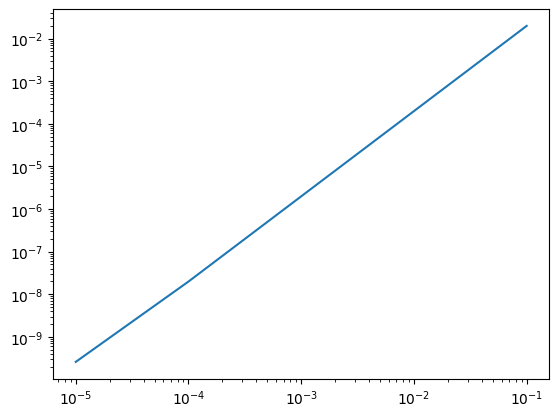

In [56]:

def derivada(f, x, tol = 1e-8):

  '''
  toma una funcion y un punto de la funcion para encontrar su derivada usando diferencias finitas
  ENTRADAS:
    f: funcion callable
    x: valor donde se quiere iterar, se penso en que fuera un entero
    tol: valor para el que se quiere que la tolerancia sea menor
  REGRESA:
    el valor de la derivada en ese punto,
    el valor del h para el cual convergio
    lista de funciones guaradas en cada iteracion
    lista de h
  '''

  n = 1
  h = lambda n : 10**(-n) # creamos una funcion que itera los h para que vayan dsiminuyendo
  f_prime_ant = 0
  f_prime_new = (f(x+h(n)) - f(x-h(n)))/ (2*h(n))
  state = True #condicion de recorrido
  hl = []
  fl = []
  while state == True:
     #Condicion de parada de nuestra funcion
    if abs(f_prime_ant - f_prime_new) < tol:
      print(f' la convergencia fue alcanzada, la derivada es {f_prime_new}, con un h de {h(n)}')
      state = False #cuando se cumple cambiamos el estado


    else: # iteramos cambiando el h y el valor con el que lo compararemos
      hl.append(h(n))
      fl.append(f_prime_new)
      n += 1
      f_prime_ant = f_prime_new
      f_prime_new = f_prime_new = (f(x+h(n)) - f(x-h(n)))/ (2*h(n))



  return  f_prime_new, h(n), hl, fl

f = lambda x : 3**x

y,h,hl,fl = derivada(f, 2)

print(f' la derivada es {y}')

df = lambda x : (3**x) * np.log(3) #Usando la pista dada por el profe, comparamos cada valor de la derivada calculado con el esperado

plt.loglog(hl, abs(fl - df(2)) ) #Graficamos dandole el valor de 2 a la funcion creada





## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



            5             4            3     2
-2.132e-13 x + 3.979e-13 x - 1.99e-13 x - 2 x - 2.398e-14 x + 2


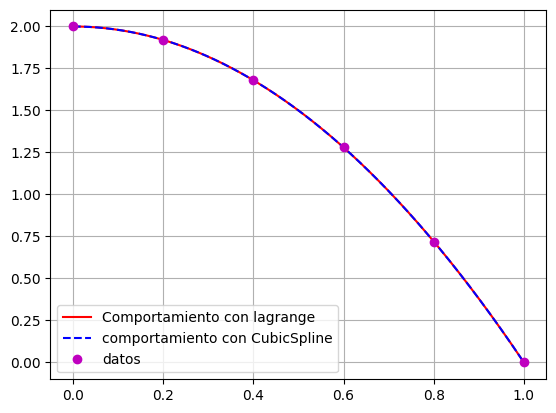

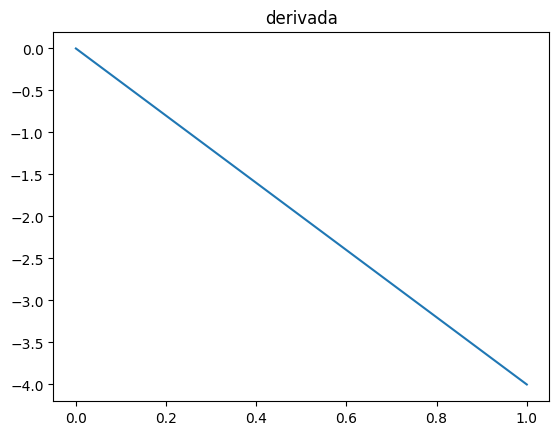

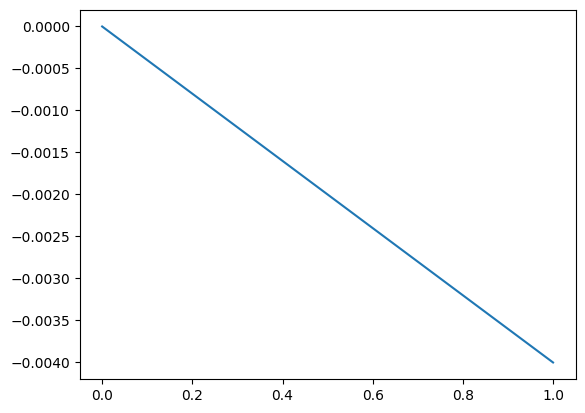

In [33]:
r = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
v = np.array([2.0, 1.92, 1.68, 1.28, 0.72, 0.0 ]) #creamos los array de los datos

pol_lagrange = lagrange(r, v) #creamos el polinomio interpolador

print(pol_lagrange)

pol_cS = CubicSpline(r, v) #los spline cubicos

#grafiquemos para ver sus comportamientos
h = 1e-4 #definimos el espaciado que habra enre las funciones

x_interp = np.arange(min(r), max(r)+h, h) #creamos un espacio equiespaciado para graficar
plt.plot(x_interp, pol_lagrange(x_interp), 'r-', label= 'Comportamiento con lagrange')
plt.plot(x_interp, pol_cS(x_interp), 'b--', label= 'comportamiento con CubicSpline')
plt.plot(r, v, 'mo', label= 'datos')
plt.legend()
plt.grid()
plt.show()


dv_dr = np.gradient(pol_cS(x_interp), h , edge_order=2) # creamos un array de puntos que (espero) se correspondan con la derivada de los puntos con un h
plt.plot(x_interp, dv_dr)
plt.title('derivada')
plt.show()

mu = 0.001
tau = lambda r : mu * dv_dr #definimos la funcion de tau

r_t = np.arange(0,1+h, h)
plt.plot(r_t, tau(r_t)) #la graficamos en los datos pedidos

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [76]:
def integral_z(y, x):
  integrando = lambda z: x*y*z  # evaluamos la integral mas interna
  resultado = quad(integrando, 0, 1-x-y)
  return resultado[0]

def integral_y(x):
  integrando = lambda y : integral_z(y, x) #procedemos con el resultado de lo calculado anteriormente
  resultado = quad(integrando,0 , 1-x)
  return resultado[0]

integral_iterativa = quad(integral_y, 0 , 1 )

print(integral_iterativa[0])

#comparemos con tpl quad

tplquad?

f = lambda z,y,x: (x*y*z)
a, b = 0, 1
g, h = lambda x: 0 , lambda x: 1-x
q, r = lambda x, y: 0, lambda x,y : 1-x-y

tp = tplquad(f ,a,b,g,h,q,r)
tp[0]

0.001388888888888889


0.001388888888888889

In [77]:
#Calculando los centros de masa
def iz(z,y,x):
  return ((x**2) + (y**2))* (x*z*y)

def ix(z,y,x):
  return ((y**2) + (z**2))* (x*z*y)


iz = tplquad(iz, a,b,g,h,q,r)[0] #definiendo las funciones anteriores y usando los limites encontrados anteriormente metemos los datos
ix = tplquad(ix, a,b,g,h,r,q)[0]

print(iz)
print(ix)

0.00029761904761904765
-0.00029761904761904765
